### Vishal Sharma

# Cooperative Multi-Agent System in Python
A Cooperative Multi-Agent System in Python is a computational framework where multiple autonomous agents interact within a shared environment to achieve individual or collective goals through cooperation and coordination. In such a system:

Each agent has its own identity, state (e.g., position), and capabilities for action and communication.

The environment is commonly modeled as a grid or spatial domain containing agents, obstacles, and goal locations.

Agents communicate directly or indirectly to share information, plan paths, avoid conflicts, and optimize task completion.

Typical operations include pathfinding (using algorithms like Breadth-First Search), real-time decision-making, and adaptive coordination to ensure all agents achieve their respective objectives while avoiding obstacles and other agents.

Implemented in Python, these systems leverage libraries like numpy for data handling and matplotlib for visualization, enabling step-by-step simulation and analysis suitable for research, robotics, and artificial intelligence studies.

### 1. Import Required Libraries
Begin by importing essential Python libraries.

numpy is used for handling numerical data and matrix operations.

matplotlib.pyplot is used for visualizing the environment and the agents’ movements in the grid.

random helps in randomly placing agents, obstacles, and goals.

collections.deque is used for efficient queue operations required in path planning (BFS) and messaging.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import deque


### 2. Define Agent Class
This defines the properties and behaviors of each agent in the system. Every agent has:

a unique identifier (id),

a current position,

a goal position,

a planned path (as a list of positions to reach the goal),

a queue to store incoming messages.
The agent can move along its planned path, receive and store messages for communication.

In [12]:
class Agent:
    def __init__(self, id, position, goal):
        self.id = id
        self.position = position
        self.goal = goal
        self.path = []
        self.message_queue = deque()

    def move(self):
        if self.path:
            self.position = self.path.pop(0)

    def set_path(self, path):
        self.path = path

    def receive_message(self, message):
        self.message_queue.append(message)


### 3. Communication Function
Defines how agents communicate.

The communicate function allows one agent to send messages to another, emulating direct messaging between agents.

Received messages are put in the recipient's message queue for later processing.

In [13]:
def communicate(agent1, agent2, message):
    agent2.receive_message(message)


### 4. Define Environment Class
Models the world in which agents operate.

The environment is a grid with a fixed size.

It stores lists of agents, obstacles, and goals.

Includes methods for initializing obstacles, placing agents and their respective goals, and handling agent movements while checking boundaries and avoiding occupied cells.

Provides a check for whether an agent has reached its goal.

In [14]:
class Environment:
    def __init__(self, grid_size, n_agents, n_obstacles=5):
        self.grid_size = grid_size
        self.agents = []
        self.obstacles = []
        self.goals = []
        self.n_agents = n_agents
        self.n_obstacles = n_obstacles
        self.initialize_obstacles()
        self.initialize_agents_and_goals()
        
    def is_occupied(self, pos):
        return pos in self.obstacles or any(agent.position == pos for agent in self.agents)
    
    def initialize_obstacles(self):
        self.obstacles = []
        while len(self.obstacles) < self.n_obstacles:
            pos = (random.randint(0, self.grid_size-1), random.randint(0, self.grid_size-1))
            if pos not in self.obstacles:
                self.obstacles.append(pos)

    def initialize_agents_and_goals(self):
        self.agents = []
        self.goals = []
        agents_placed = 0
        while agents_placed < self.n_agents:
            pos = (random.randint(0, self.grid_size-1), random.randint(0, self.grid_size-1))
            goal = (random.randint(0, self.grid_size-1), random.randint(0, self.grid_size-1))
            if not self.is_occupied(pos) and not self.is_occupied(goal) and pos != goal:
                agent = Agent(agents_placed, pos, goal)
                self.agents.append(agent)
                self.goals.append(goal)
                agents_placed += 1
                
    def move_agent(self, agent, direction):
        movement = {'UP': (-1, 0), 'DOWN': (1, 0), 'LEFT': (0, -1), 'RIGHT': (0, 1)}
        new_pos = (agent.position[0] + movement[direction][0], agent.position[1] + movement[direction][1])
        if (0 <= new_pos[0] < self.grid_size and 
            0 <= new_pos[1] < self.grid_size and 
            not self.is_occupied(new_pos)):
            agent.position = new_pos
    
    def agent_at_goal(self, agent):
        return agent.position == agent.goal


### 5. Path Planning (Simple BFS)
Implements a path-finding algorithm using Breadth-First Search (BFS).

Given the agent’s position, its goal, and current obstacles, it finds the shortest possible path on the grid.

This ensures agents can efficiently plan how to reach their goals while avoiding obstacles.

In [15]:
def plan_path(environment, agent):
    grid_size = environment.grid_size
    start = agent.position
    goal = agent.goal
    obstacles = set(environment.obstacles)
    visited = set()
    queue = deque()
    parent = {}
    queue.append(start)
    visited.add(start)
    found = False

    while queue:
        current = queue.popleft()
        if current == goal:
            found = True
            break        
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            new_pos = (current[0]+dx, current[1]+dy)
            if (0 <= new_pos[0] < grid_size and 0 <= new_pos[1] < grid_size and
                new_pos not in visited and new_pos not in obstacles):
                queue.append(new_pos)
                visited.add(new_pos)
                parent[new_pos] = current
    if not found:
        return []
    # Reconstruct path
    path = []
    node = goal
    while node != start:
        path.append(node)
        node = parent[node]
    path.reverse()
    return path


### 6. Cooperative Coordination
Assigns each agent a planned path using the path-planning function.

This function can be expanded to let agents share information or negotiate paths if needed.

As written, it simply calculates the optimal path for each agent and stores it.

In [16]:
def coordinate_agents(environment):
    for agent in environment.agents:
        path = plan_path(environment, agent)
        agent.set_path(path)


### 7. Visualization Function
Enables graphical visualization of the grid environment.

It shows obstacles, goal positions, and the agents at every step.

Each agent, obstacle, and goal are visually distinguished by color or label, making it easier to track their progress and interactions over time in the simulation.

In [17]:
def plot_environment(environment, step=0):
    grid = np.zeros((environment.grid_size, environment.grid_size))
    for obst in environment.obstacles:
        grid[obst] = -1
    for goal in environment.goals:
        grid[goal] = 2
    for agent in environment.agents:
        grid[agent.position] = agent.id+3
        
    plt.figure(figsize=(5,5))
    plt.imshow(grid, cmap='jet', origin='upper')
    plt.title(f"Step {step}")
    for idx, agent in enumerate(environment.agents):
        plt.text(agent.position[1], agent.position[0], f"A{agent.id}", color='white', ha='center', va='center')
    plt.xticks(range(environment.grid_size))
    plt.yticks(range(environment.grid_size))
    plt.grid(True)
    plt.show()


### 8. Run Simulation
Executes the main simulation loop.

Each agent follows its path step-by-step, moving closer to its goal.

At every step, the environment is re-drawn, so you can observe the agents as they move.

The simulation ends automatically when all agents have reached their respective goals, or when the maximum number of steps is reached.

In [18]:
def run_simulation(environment, max_steps=20):
    coordinate_agents(environment)
    step = 0
    plot_environment(environment, step)
    while step < max_steps:
        for agent in environment.agents:
            if agent.path:
                agent.move()
        step += 1
        plot_environment(environment, step)
        if all(environment.agent_at_goal(agent) for agent in environment.agents):
            print(f"All agents reached their goals in {step} steps!")
            break


### 9. Evaluate Performance
Calculates how efficiently the agents completed their tasks.

Evaluates, for example, the average number of steps taken by all agents to reach their goals.

This metric helps assess the cooperativeness and efficiency of your overall multi-agent system.

In [19]:
def evaluate_performance(environment):
    steps_list = []
    for agent in environment.agents:
        steps_list.append(len(agent.path))
    avg_steps = np.mean(steps_list)
    print(f"Average steps taken by agents to reach goals: {avg_steps}")


### 10. Main: Create Environment, Run System
Serves as the main entry point of the program.

Sets up randomized, reproducible scenarios by using fixed random seeds.

Initializes the environment, then calls the main simulation and evaluation functions to run everything from start to finish with a simple, modifiable interface.

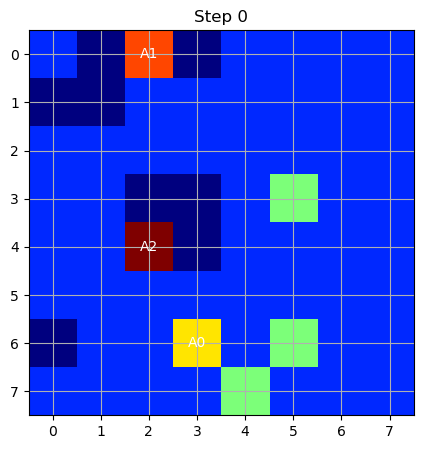

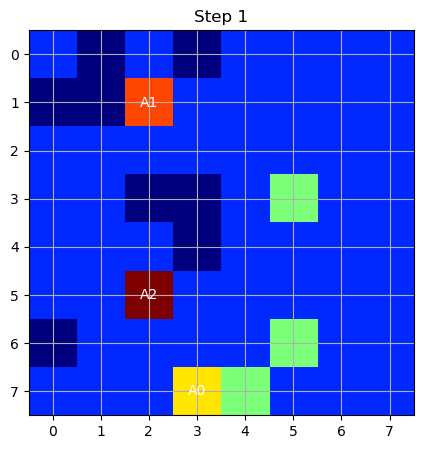

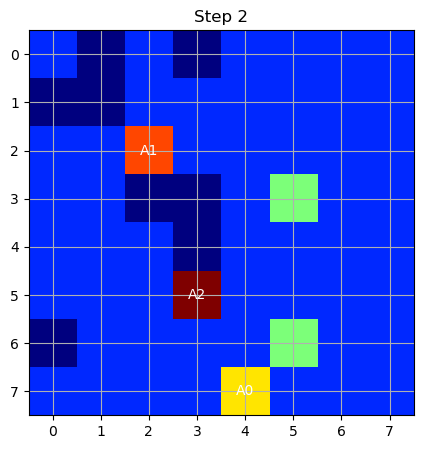

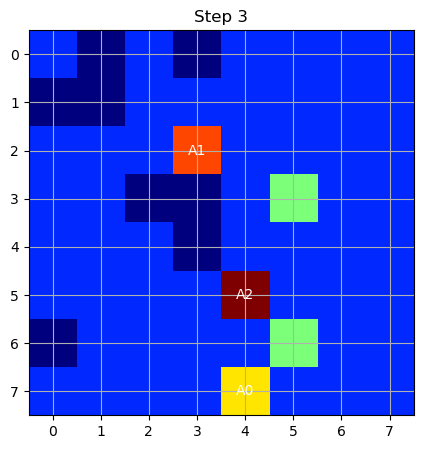

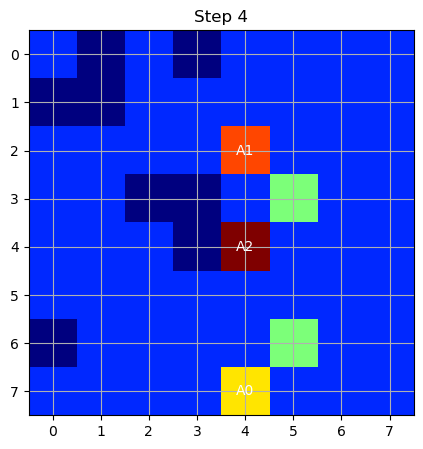

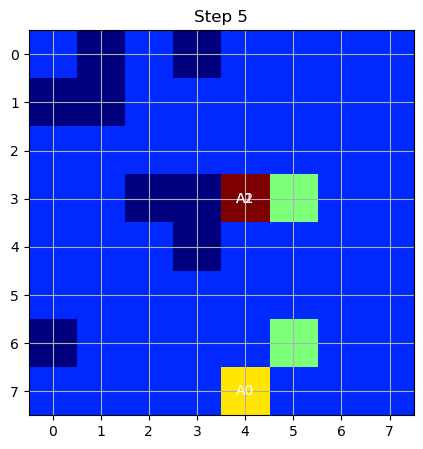

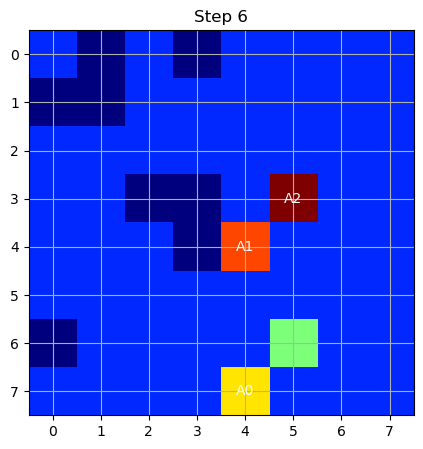

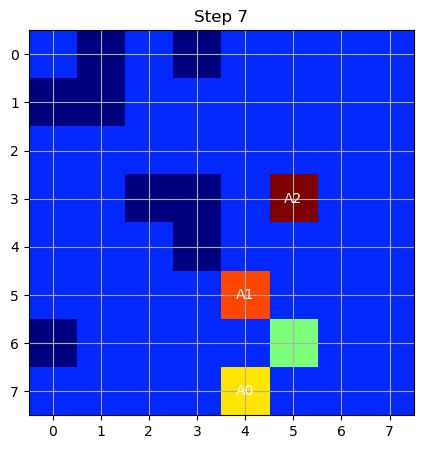

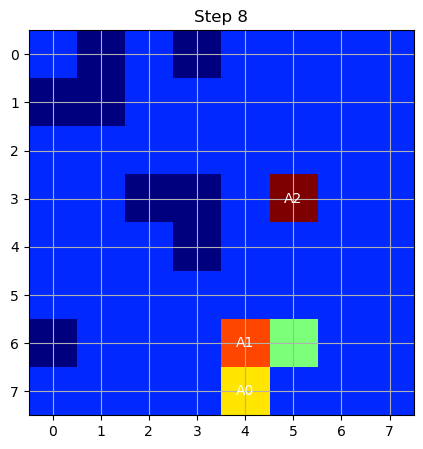

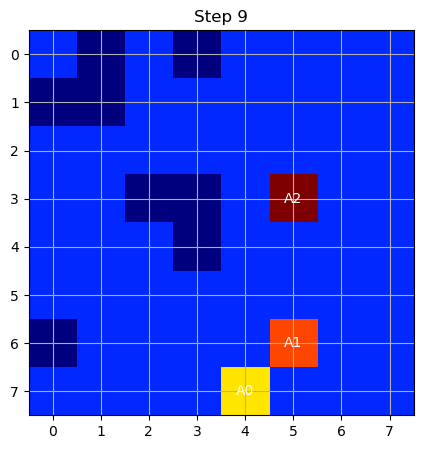

All agents reached their goals in 9 steps!
Average steps taken by agents to reach goals: 0.0


In [20]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

grid_size = 8
n_agents = 3
environment = Environment(grid_size=grid_size, n_agents=n_agents, n_obstacles=8)

run_simulation(environment, max_steps=16)
evaluate_performance(environment)


### 11. Output Interpretation
The plots will show the environment grid at each step.

Obstacles are marked as blue, goals as yellow, and agents as distinct colored squares with labels.

The system terminates once all agents reach their go

Explains how to read and understand the results.

Describes what each color or symbol in the plot means (e.g., where agents, obstacles, and goals are located).

Informs you when the system has achieved all goals and what the performance metrics indicate.

Highlights how you can customize variables for more complex or varied experiments.als.